In [1]:
import requests
import json
import time
import random
import pandas as pd
import os
from fake_useragent import UserAgent
ua = UserAgent()
import plotly_express as px

In [21]:
def Generation(news_line):
    generated_news_list = []
    category_list = []
    media_list = []
    fact_list = []

    url = "https://oa.api2d.net/v1/chat/completions"

    api_key = []
    api_key.append("fk**")
    api_key.append("fk**")
    api_key.append("fk**")
    api_key.append("fk**")
    api_key.append("fk**")

    api_key_random = random.choice(api_key)
    
    api_content = 'Bearer ' + api_key_random

    headers = {'Content-Type': 'application/json','Authorization': api_content,"User-Agent" : ua.random,
    }

    if news_line['Category'] == 'International Politics':
        category = '国际政治'
    elif news_line['Category'] == 'Entertainment & Sport':
        category = '文体娱乐'
    elif news_line['Category'] == 'Health & Medicine':
        category = '健康医疗'
    
    news_content = news_line['Story']

    if news_line['Media'] == 'Hong Kong 01':
        content = "你現在是一個香港"+category+"新聞記者。給我根據提供內容寫一篇中文真實報導，輸出繁體中文，保留所有新聞細節，字數大於等於600字，盡量詳細。主要內容："+news_content
    else:
        content = "你现在是一个"+category+"新闻记者。给我根据提供内容写一篇中文真实报道，输出简体中文，保留所有新闻细节，字数大于等于600字，尽量详细。主要内容："+news_content

    data = {"model": "gpt-3.5-turbo","messages": [{"role": "user", "content": content}],"n":2
    }

    time.sleep(random.uniform(0.5, 1))

    response = requests.post(url, headers=headers, json=data)

    print("Status Code", response.status_code)
    print(news_line['Fact'],news_line['Media'])
    if response.status_code != 200:
        print("Error", response.status_code, response.text)
        return
    else:
        response = response.json()
        # 解析JSON响应
        response_json = json.loads(json.dumps(response))

        # 获取message的content
        try:
            for i in range(2):
                content = response_json['choices'][i]['message']['content']
                generated_news_list.append(content)
                category_list.append(news_line['Category'])
                media_list.append(news_line['Media'])
                fact_list.append(news_line['Fact'])
            if os.path.exists('dataset/news_generated_data.csv'):  # 如果文件存在，不再设置表头
                    header = False
            else:  # 否则，设置csv文件表头
                    header = True
            news_generated_data = pd.DataFrame({'Category':category_list,'Media':media_list,'Fact':fact_list,'Generated News':generated_news_list})
            news_generated_data.to_csv('dataset/news_generated_data.csv',mode='a+',index=False,encoding='utf-8-sig',header=header)

        except:
            content = 'Error'
            generated_news_list.append(content)
            category_list.append(news_line['Category'])
            media_list.append(news_line['Media'])
            fact_list.append(news_line['Fact'])
            news_generated_data = pd.DataFrame({'Category':category_list,'Media':media_list,'Fact':fact_list,'Generated News':generated_news_list})
            news_generated_data.to_csv('dataset/news_generated_data.csv',mode='a+',index=True,encoding='utf-8-sig',header=header)

In [22]:
import pandas as pd
dfnews = pd.read_csv('dataset/NewsData.csv')
dfnews.tail()

,Category,Story,Media,Fact,Links
40,Health & Medicine,世衛批准中國科興疫苗作緊急使用 建議用於18歲以上人士\n世界衛生組織（WHO）6月1日宣布...,Hong Kong 01,11,https://www.hk01.com/article/632655?utm_source...
41,Health & Medicine,新冠肺炎｜世衛：⁬Delta為最易傳播變種病毒株\n世界衛生組織（WHO）6月25日稱，最初...,Hong Kong 01,12,https://www.hk01.com/article/642935?utm_source...
42,Health & Medicine,心臟病｜低脂奶好過全脂戒即食麵 防心臟病10招薯仔要這樣吃!\n根據世界衛生組織（World...,Hong Kong 01,13,https://www.hk01.com/article/592177?utm_source...
43,Health & Medicine,新冠肺炎｜河南鄭州增12宗本地個案 10萬人連夜檢測今停接種疫苗\n在河南鄭州遭受暴雨侵襲之...,Hong Kong 01,14,https://www.hk01.com/article/657935?utm_source...
44,Health & Medicine,新冠肺炎｜缺乏維他命D染疫後易重症增死亡率？專家一文拆解迷思 \n維他命D是對於維持骨骼健康...,Hong Kong 01,15,https://www.hk01.com/article/738564?utm_source...


In [20]:
for s in range(len(dfnews)):
    try:
        Generation(dfnews.iloc[s])
    except:
        break

Status Code 200
1 Lianhe Zaobao
Status Code 200
2 Lianhe Zaobao
Status Code 200
3 Lianhe Zaobao
Status Code 200
4 Lianhe Zaobao
Status Code 200
5 Lianhe Zaobao
Status Code 200
6 Lianhe Zaobao
Status Code 200
7 Lianhe Zaobao
Status Code 200
8 Lianhe Zaobao
Status Code 200
9 Lianhe Zaobao
Status Code 200
10 Lianhe Zaobao
Status Code 200
11 Lianhe Zaobao
Status Code 200
12 Lianhe Zaobao
Status Code 200
13 Lianhe Zaobao
Status Code 200
14 Lianhe Zaobao


In [35]:
gener_df = pd.read_csv('dataset/news_generated_data_final.csv')
display(gener_df)
display(gener_df.info())

,Category,Media,Fact,Generated News
0,International Politics,Hong Kong 01,1.0,据報導，特朗普支持者从早晨开始集结在國會大厦附近，庞大的人群激动地高喊着口号，不断挑衅警方，...
1,International Politics,Hong Kong 01,1.0,這場政變的引爆源頭是敗選的總統特朗普和一些支持他的共和黨人，他們指控選舉舞弊，不惜煽動支持者...
2,International Politics,Hong Kong 01,1.0,今日，美國持續發酵的政治危機再度引發全球關注。2020年選舉敗選總統特朗普的支持者，天真地相...
3,International Politics,Hong Kong 01,1.0,這場突發事件癱瘓了美國的立法機構，不僅讓國會議員們驚恐失措，更讓國際社會大為震驚。\n\n自...
4,International Politics,Hong Kong 01,1.0,特朗普支持者衝擊國會，美國陷入政變\n\n美國時間1月6日，敗選總統特朗普的支持者佔領了國會...
...,...,...,...,...
446,Health & Medicine,Xinhua News Agency,15.0,以色列研究人员近日发布了一份有关新冠疫情的医学论文，在该论文中，他们指出缺乏维生素D的人如果...
447,Health & Medicine,Xinhua News Agency,15.0,近日，以色列研究人员在美国预印本网站医学论文档案网上发表了一篇报告，称如果缺乏维生素D，感染...
448,Health & Medicine,Xinhua News Agency,15.0,随着新冠疫情在全球蔓延，许多科学家和医生都在努力研究影响感染后发展的因素。而以色列研究人员最...
449,Health & Medicine,Xinhua News Agency,15.0,2021年6月18日，以色列研究人员在美国预印本网站医学论文档案网上发布了一份有关新冠病毒和...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        450 non-null    object 
 1   Media           450 non-null    object 
 2   Fact            450 non-null    float64
 3   Generated News  450 non-null    object 
dtypes: float64(1), object(3)
memory usage: 14.2+ KB


None

# **Visualization**

### **Import dataset**

In [2]:
all_df = pd.read_csv('dataset/news_generated_data_final.csv',encoding='utf-8-sig')
all_df

,Category,Media,Fact,Generated News,Subjective Commentary,Basic Faults,Additional Faults,Predicted Score,Basic Faults Counts,Additional Faults Counts,Generated News Words Count,Correctness,Basic Faults Split,Additional Faults Split,Predicted Results,Predicted Correctness
0,International Politics,Hong Kong 01,1,据報導，特朗普支持者从早晨开始集结在國會大厦附近，庞大的人群激动地高喊着口号，不断挑衅警方，...,Yes,Time Not Mentioned|,NaN,0.270555,1,0,447,Incorrect,Time Not Mentioned,NaN,Probably Truth,Incorrect
1,International Politics,Hong Kong 01,1,這場政變的引爆源頭是敗選的總統特朗普和一些支持他的共和黨人，他們指控選舉舞弊，不惜煽動支持者...,Yes,Time Not Mentioned|特朗普被指控犯有暴動罪|,比爾·巴爾的選舉舞弊指控|,0.100127,2,1,415,Incorrect,"Time Not Mentioned,特朗普,被,指控,犯,有,暴動罪","比爾·巴爾,的,選舉,舞弊,指控",Truth,Incorrect
2,International Politics,Hong Kong 01,1,今日，美國持續發酵的政治危機再度引發全球關注。2020年選舉敗選總統特朗普的支持者，天真地相...,Yes,Time Not Mentioned|,國民警衛軍緊急出動，發射催淚彈與橡膠子彈鎮壓暴力行動|,0.755723,1,1,336,Incorrect,Time Not Mentioned,"國民警衛軍,緊急,出動,發,射,催淚,彈,與,橡膠子彈鎮壓,暴力行動",Not Truth,Correct
3,International Politics,Hong Kong 01,1,這場突發事件癱瘓了美國的立法機構，不僅讓國會議員們驚恐失措，更讓國際社會大為震驚。\n\n自...,No,NaN,白宮發言人表示，總統拜登認為這是一個“暴力攻擊政府”的事件|,0.059726,0,1,661,Basic Correct,NaN,"白宮發言人,表示,總統,拜登,認為,這,是,一個,“,暴力,攻,擊,政府,”,的,事件",Truth,Incorrect
4,International Politics,Hong Kong 01,1,特朗普支持者衝擊國會，美國陷入政變\n\n美國時間1月6日，敗選總統特朗普的支持者佔領了國會...,Yes,NaN,美國共和國|,0.127581,0,1,540,Basic Correct,NaN,美國共和國,Truth,Incorrect
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,Health & Medicine,Xinhua News Agency,15,6月18日，以色列研究人员在预印本网站医学论文档案网上发布最新研究报告称，缺乏维生素D的人如...,Yes,这项研究是由以色列Tel Aviv大学的研究人员和以色列克拉维火炬科技公司展开的|约有50%...,NaN,0.005339,2,0,566,Incorrect,"这项,研究,是,由,以色列,Tel Aviv,大学,的,研究人员,和,以色列克拉维火炬科技公...",NaN,Truth,Incorrect
446,Health & Medicine,Xinhua News Agency,15,以色列研究人员近日发布了一份有关新冠疫情的医学论文，在该论文中，他们指出缺乏维生素D的人如果...,Yes,这项研究基于约780名新冠肺炎患者的调查|Time Not Mentioned| 研究人员在...,NaN,0.014651,3,0,658,Incorrect,"这项,研究,基于,约,780名,新冠肺炎,患者,的,调查,Time Not Mentione...",NaN,Truth,Incorrect
447,Health & Medicine,Xinhua News Agency,15,近日，以色列研究人员在美国预印本网站医学论文档案网上发表了一篇报告，称如果缺乏维生素D，感染...,Yes,对以色列南部贝尔谢巴的一组新冠感染者进行了跟踪研究，其中包括了大约780名新冠感染者|仍有超...,NaN,0.005126,3,0,618,Incorrect,"对,以色列,南部,贝尔谢巴,的,一组,新冠感染者,进行,了,跟踪,研究,其中,包括,了,大约...",NaN,Truth,Incorrect
448,Health & Medicine,Xinhua News Agency,15,随着新冠疫情在全球蔓延，许多科学家和医生都在努力研究影响感染后发展的因素。而以色列研究人员最...,Yes,Time Not Mentioned|,许多专家和医生发起了一项名为“独处日晒计划”的倡议|,0.008084,1,1,519,Incorrect,Time Not Mentioned,"许多,专家,和,医生,发起,了,一项,名,为,“,独处,日晒,计划,”,的,倡议",Truth,Incorrect


In [3]:
all_df['Basic Faults Counts'] = 0
all_df['Basic Faults Counts'] = all_df['Basic Faults Counts'].astype('int64')

all_df['Additional Faults Counts'] = 0
all_df['Additional Faults Counts'] = all_df['Additional Faults Counts'].astype('int64')

all_df['Generated News Words Count'] = all_df['Generated News'].apply(lambda x: len(x))
all_df['Generated News Words Count'] = all_df['Generated News Words Count'].astype('int64')

all_df

,Category,Media,Fact,Generated News,Subjective Commentary,Basic Faults,Additional Faults,Predicted Score,Basic Faults Counts,Additional Faults Counts,Generated News Words Count,Correctness,Basic Faults Split,Additional Faults Split,Predicted Results,Predicted Correctness
0,International Politics,Hong Kong 01,1,据報導，特朗普支持者从早晨开始集结在國會大厦附近，庞大的人群激动地高喊着口号，不断挑衅警方，...,Yes,Time Not Mentioned|,NaN,0.270555,0,0,447,Incorrect,Time Not Mentioned,NaN,Probably Truth,Incorrect
1,International Politics,Hong Kong 01,1,這場政變的引爆源頭是敗選的總統特朗普和一些支持他的共和黨人，他們指控選舉舞弊，不惜煽動支持者...,Yes,Time Not Mentioned|特朗普被指控犯有暴動罪|,比爾·巴爾的選舉舞弊指控|,0.100127,0,0,415,Incorrect,"Time Not Mentioned,特朗普,被,指控,犯,有,暴動罪","比爾·巴爾,的,選舉,舞弊,指控",Truth,Incorrect
2,International Politics,Hong Kong 01,1,今日，美國持續發酵的政治危機再度引發全球關注。2020年選舉敗選總統特朗普的支持者，天真地相...,Yes,Time Not Mentioned|,國民警衛軍緊急出動，發射催淚彈與橡膠子彈鎮壓暴力行動|,0.755723,0,0,336,Incorrect,Time Not Mentioned,"國民警衛軍,緊急,出動,發,射,催淚,彈,與,橡膠子彈鎮壓,暴力行動",Not Truth,Correct
3,International Politics,Hong Kong 01,1,這場突發事件癱瘓了美國的立法機構，不僅讓國會議員們驚恐失措，更讓國際社會大為震驚。\n\n自...,No,NaN,白宮發言人表示，總統拜登認為這是一個“暴力攻擊政府”的事件|,0.059726,0,0,661,Basic Correct,NaN,"白宮發言人,表示,總統,拜登,認為,這,是,一個,“,暴力,攻,擊,政府,”,的,事件",Truth,Incorrect
4,International Politics,Hong Kong 01,1,特朗普支持者衝擊國會，美國陷入政變\n\n美國時間1月6日，敗選總統特朗普的支持者佔領了國會...,Yes,NaN,美國共和國|,0.127581,0,0,540,Basic Correct,NaN,美國共和國,Truth,Incorrect
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,Health & Medicine,Xinhua News Agency,15,6月18日，以色列研究人员在预印本网站医学论文档案网上发布最新研究报告称，缺乏维生素D的人如...,Yes,这项研究是由以色列Tel Aviv大学的研究人员和以色列克拉维火炬科技公司展开的|约有50%...,NaN,0.005339,0,0,566,Incorrect,"这项,研究,是,由,以色列,Tel Aviv,大学,的,研究人员,和,以色列克拉维火炬科技公...",NaN,Truth,Incorrect
446,Health & Medicine,Xinhua News Agency,15,以色列研究人员近日发布了一份有关新冠疫情的医学论文，在该论文中，他们指出缺乏维生素D的人如果...,Yes,这项研究基于约780名新冠肺炎患者的调查|Time Not Mentioned| 研究人员在...,NaN,0.014651,0,0,658,Incorrect,"这项,研究,基于,约,780名,新冠肺炎,患者,的,调查,Time Not Mentione...",NaN,Truth,Incorrect
447,Health & Medicine,Xinhua News Agency,15,近日，以色列研究人员在美国预印本网站医学论文档案网上发表了一篇报告，称如果缺乏维生素D，感染...,Yes,对以色列南部贝尔谢巴的一组新冠感染者进行了跟踪研究，其中包括了大约780名新冠感染者|仍有超...,NaN,0.005126,0,0,618,Incorrect,"对,以色列,南部,贝尔谢巴,的,一组,新冠感染者,进行,了,跟踪,研究,其中,包括,了,大约...",NaN,Truth,Incorrect
448,Health & Medicine,Xinhua News Agency,15,随着新冠疫情在全球蔓延，许多科学家和医生都在努力研究影响感染后发展的因素。而以色列研究人员最...,Yes,Time Not Mentioned|,许多专家和医生发起了一项名为“独处日晒计划”的倡议|,0.008084,0,0,519,Incorrect,Time Not Mentioned,"许多,专家,和,医生,发起,了,一项,名,为,“,独处,日晒,计划,”,的,倡议",Truth,Incorrect


#### **Average Words Counts**

In [4]:
all_df_news_words_count = all_df.groupby(['Category'])['Generated News Words Count'].mean().reset_index()
all_df_news_words_count.loc[len(all_df_news_words_count)] = ['All',all_df['Generated News Words Count'].mean()]
all_df_news_words_count

,Category,Generated News Words Count
0,Entertainment & Sport,539.146667
1,Health & Medicine,551.106667
2,International Politics,553.620000
3,All,547.957778


#### **Faults Counts**

In [6]:
basic_faults_list = all_df['Basic Faults'].fillna('').str.split('|').tolist()
basic_counts = [len([i for i in lst if i]) for lst in basic_faults_list]
all_df['Basic Faults Counts'] = basic_counts

additional_faults_list = all_df['Additional Faults'].fillna('').str.split('|').tolist()
additional_counts = [len([i for i in lst if i]) for lst in additional_faults_list]
all_df['Additional Faults Counts'] = additional_counts

all_df

,Category,Media,Fact,Generated News,Subjective Commentary,Basic Faults,Additional Faults,Predicted Score,Basic Faults Counts,Additional Faults Counts,Generated News Words Count,Correctness,Basic Faults Split,Additional Faults Split,Predicted Results,Predicted Correctness
0,International Politics,Hong Kong 01,1,据報導，特朗普支持者从早晨开始集结在國會大厦附近，庞大的人群激动地高喊着口号，不断挑衅警方，...,Yes,Time Not Mentioned|,NaN,0.270555,1,0,447,All Correct,Time Not Mentioned,NaN,Probably Truth,Incorrect
1,International Politics,Hong Kong 01,1,這場政變的引爆源頭是敗選的總統特朗普和一些支持他的共和黨人，他們指控選舉舞弊，不惜煽動支持者...,Yes,Time Not Mentioned|特朗普被指控犯有暴動罪|,比爾·巴爾的選舉舞弊指控|,0.100127,2,1,415,All Correct,"Time Not Mentioned,特朗普,被,指控,犯,有,暴動罪","比爾·巴爾,的,選舉,舞弊,指控",Truth,Incorrect
2,International Politics,Hong Kong 01,1,今日，美國持續發酵的政治危機再度引發全球關注。2020年選舉敗選總統特朗普的支持者，天真地相...,Yes,Time Not Mentioned|,國民警衛軍緊急出動，發射催淚彈與橡膠子彈鎮壓暴力行動|,0.755723,1,1,336,All Correct,Time Not Mentioned,"國民警衛軍,緊急,出動,發,射,催淚,彈,與,橡膠子彈鎮壓,暴力行動",Not Truth,Correct
3,International Politics,Hong Kong 01,1,這場突發事件癱瘓了美國的立法機構，不僅讓國會議員們驚恐失措，更讓國際社會大為震驚。\n\n自...,No,NaN,白宮發言人表示，總統拜登認為這是一個“暴力攻擊政府”的事件|,0.059726,0,1,661,All Correct,NaN,"白宮發言人,表示,總統,拜登,認為,這,是,一個,“,暴力,攻,擊,政府,”,的,事件",Truth,Incorrect
4,International Politics,Hong Kong 01,1,特朗普支持者衝擊國會，美國陷入政變\n\n美國時間1月6日，敗選總統特朗普的支持者佔領了國會...,Yes,NaN,美國共和國|,0.127581,0,1,540,All Correct,NaN,美國共和國,Truth,Incorrect
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,Health & Medicine,Xinhua News Agency,15,6月18日，以色列研究人员在预印本网站医学论文档案网上发布最新研究报告称，缺乏维生素D的人如...,Yes,这项研究是由以色列Tel Aviv大学的研究人员和以色列克拉维火炬科技公司展开的|约有50%...,NaN,0.005339,2,0,566,All Correct,"这项,研究,是,由,以色列,Tel Aviv,大学,的,研究人员,和,以色列克拉维火炬科技公...",NaN,Truth,Incorrect
446,Health & Medicine,Xinhua News Agency,15,以色列研究人员近日发布了一份有关新冠疫情的医学论文，在该论文中，他们指出缺乏维生素D的人如果...,Yes,这项研究基于约780名新冠肺炎患者的调查|Time Not Mentioned| 研究人员在...,NaN,0.014651,3,0,658,All Correct,"这项,研究,基于,约,780名,新冠肺炎,患者,的,调查,Time Not Mentione...",NaN,Truth,Incorrect
447,Health & Medicine,Xinhua News Agency,15,近日，以色列研究人员在美国预印本网站医学论文档案网上发表了一篇报告，称如果缺乏维生素D，感染...,Yes,对以色列南部贝尔谢巴的一组新冠感染者进行了跟踪研究，其中包括了大约780名新冠感染者|仍有超...,NaN,0.005126,3,0,618,All Correct,"对,以色列,南部,贝尔谢巴,的,一组,新冠感染者,进行,了,跟踪,研究,其中,包括,了,大约...",NaN,Truth,Incorrect
448,Health & Medicine,Xinhua News Agency,15,随着新冠疫情在全球蔓延，许多科学家和医生都在努力研究影响感染后发展的因素。而以色列研究人员最...,Yes,Time Not Mentioned|,许多专家和医生发起了一项名为“独处日晒计划”的倡议|,0.008084,1,1,519,All Correct,Time Not Mentioned,"许多,专家,和,医生,发起,了,一项,名,为,“,独处,日晒,计划,”,的,倡议",Truth,Incorrect


In [7]:
all_df_plot = all_df
all_df_plot['Correctness'] = ''
all_correct = (all_df_plot['Basic Faults Counts'] == 0) & (all_df_plot['Additional Faults Counts'] == 0)
all_df_plot.loc[all_correct,'Correctness'] = 'All Correct'
basic_correct = (all_df_plot['Basic Faults Counts'] == 0) & (all_df_plot['Additional Faults Counts'] != 0)
all_df_plot.loc[basic_correct,'Correctness'] = 'Basic Correct'
rest = all_df_plot[~(all_correct | basic_correct)]
all_df_plot.loc[rest.index,'Correctness'] = 'Incorrect'
all_df_plot

,Category,Media,Fact,Generated News,Subjective Commentary,Basic Faults,Additional Faults,Predicted Score,Basic Faults Counts,Additional Faults Counts,Generated News Words Count,Correctness,Basic Faults Split,Additional Faults Split,Predicted Results,Predicted Correctness
0,International Politics,Hong Kong 01,1,据報導，特朗普支持者从早晨开始集结在國會大厦附近，庞大的人群激动地高喊着口号，不断挑衅警方，...,Yes,Time Not Mentioned|,NaN,0.270555,1,0,447,Incorrect,Time Not Mentioned,NaN,Probably Truth,Incorrect
1,International Politics,Hong Kong 01,1,這場政變的引爆源頭是敗選的總統特朗普和一些支持他的共和黨人，他們指控選舉舞弊，不惜煽動支持者...,Yes,Time Not Mentioned|特朗普被指控犯有暴動罪|,比爾·巴爾的選舉舞弊指控|,0.100127,2,1,415,Incorrect,"Time Not Mentioned,特朗普,被,指控,犯,有,暴動罪","比爾·巴爾,的,選舉,舞弊,指控",Truth,Incorrect
2,International Politics,Hong Kong 01,1,今日，美國持續發酵的政治危機再度引發全球關注。2020年選舉敗選總統特朗普的支持者，天真地相...,Yes,Time Not Mentioned|,國民警衛軍緊急出動，發射催淚彈與橡膠子彈鎮壓暴力行動|,0.755723,1,1,336,Incorrect,Time Not Mentioned,"國民警衛軍,緊急,出動,發,射,催淚,彈,與,橡膠子彈鎮壓,暴力行動",Not Truth,Correct
3,International Politics,Hong Kong 01,1,這場突發事件癱瘓了美國的立法機構，不僅讓國會議員們驚恐失措，更讓國際社會大為震驚。\n\n自...,No,NaN,白宮發言人表示，總統拜登認為這是一個“暴力攻擊政府”的事件|,0.059726,0,1,661,Basic Correct,NaN,"白宮發言人,表示,總統,拜登,認為,這,是,一個,“,暴力,攻,擊,政府,”,的,事件",Truth,Incorrect
4,International Politics,Hong Kong 01,1,特朗普支持者衝擊國會，美國陷入政變\n\n美國時間1月6日，敗選總統特朗普的支持者佔領了國會...,Yes,NaN,美國共和國|,0.127581,0,1,540,Basic Correct,NaN,美國共和國,Truth,Incorrect
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,Health & Medicine,Xinhua News Agency,15,6月18日，以色列研究人员在预印本网站医学论文档案网上发布最新研究报告称，缺乏维生素D的人如...,Yes,这项研究是由以色列Tel Aviv大学的研究人员和以色列克拉维火炬科技公司展开的|约有50%...,NaN,0.005339,2,0,566,Incorrect,"这项,研究,是,由,以色列,Tel Aviv,大学,的,研究人员,和,以色列克拉维火炬科技公...",NaN,Truth,Incorrect
446,Health & Medicine,Xinhua News Agency,15,以色列研究人员近日发布了一份有关新冠疫情的医学论文，在该论文中，他们指出缺乏维生素D的人如果...,Yes,这项研究基于约780名新冠肺炎患者的调查|Time Not Mentioned| 研究人员在...,NaN,0.014651,3,0,658,Incorrect,"这项,研究,基于,约,780名,新冠肺炎,患者,的,调查,Time Not Mentione...",NaN,Truth,Incorrect
447,Health & Medicine,Xinhua News Agency,15,近日，以色列研究人员在美国预印本网站医学论文档案网上发表了一篇报告，称如果缺乏维生素D，感染...,Yes,对以色列南部贝尔谢巴的一组新冠感染者进行了跟踪研究，其中包括了大约780名新冠感染者|仍有超...,NaN,0.005126,3,0,618,Incorrect,"对,以色列,南部,贝尔谢巴,的,一组,新冠感染者,进行,了,跟踪,研究,其中,包括,了,大约...",NaN,Truth,Incorrect
448,Health & Medicine,Xinhua News Agency,15,随着新冠疫情在全球蔓延，许多科学家和医生都在努力研究影响感染后发展的因素。而以色列研究人员最...,Yes,Time Not Mentioned|,许多专家和医生发起了一项名为“独处日晒计划”的倡议|,0.008084,1,1,519,Incorrect,Time Not Mentioned,"许多,专家,和,医生,发起,了,一项,名,为,“,独处,日晒,计划,”,的,倡议",Truth,Incorrect


In [8]:
print(all_df_plot['Basic Faults Counts'].mean())
print(all_df_plot['Additional Faults Counts'].mean())

0.5777777777777777
0.6688888888888889


In [12]:
import plotly.graph_objects as go

# 数据
labels = ['All Correct', 'Basic Correct', 'Incorrect']
values = all_df_plot['Correctness'].value_counts()

# 按特定顺序排序
sorted_values = [values[label] for label in labels]

# 设置样式参数
fig = go.Figure(data=[go.Pie(labels=labels, 
                             values=sorted_values, 
                             textinfo='label+percent',
                             sort=False,hole=0.4,marker=dict(colors=['rgb(41,90,89)','rgb(116,170,156)','rgb(152,152,152)']))])

# 设置布局参数
fig.update_layout(
    title=dict(text='<b>Overall Porprotion of Correctness</b>', font=dict(size=24, family='Arial, sans-serif')),
    font=dict(family='Arial, sans-serif', size=18),
    template="plotly_white",
    width=900,
    height=600
)

# 保存图片
fig.write_image('images/All Results.png', scale=2)
fig.update_traces(direction='clockwise')
fig.show()

In [13]:
df_all_correct = all_df_plot[all_df_plot['Correctness'] == 'All Correct']
df_basic_correct = all_df_plot[all_df_plot['Correctness'] == 'Basic Correct']
df_incorrect = all_df_plot[all_df_plot['Correctness'] == 'Incorrect']

df_all_correct_plot = df_all_correct.groupby(['Fact'])['Correctness'].count()
df_basic_correct_plot = df_basic_correct.groupby(['Fact'])['Correctness'].count()
df_incorrect_plot = df_incorrect.groupby(['Fact'])['Correctness'].count()

fig = go.Figure()
fig.add_trace(go.Bar(x=df_all_correct_plot.index, y=df_all_correct_plot.values, name='All Correct',marker_color='rgb(41,90,89)'))
fig.add_trace(go.Bar(x=df_basic_correct_plot.index, y=df_basic_correct_plot.values, name='Basic Correct',marker_color='rgb(116,170,156)'))
fig.add_trace(go.Bar(x=df_incorrect_plot.index, y=df_incorrect_plot.values, name='Incorrect',marker_color='rgb(152,152,152)'))

fig.update_layout(
    title=dict(text='<b>Detailed Counts of Correctness by Facts</b>', font=dict(size=24, family='Arial, sans-serif')),
    font=dict(family='Arial, sans-serif', size=18),
    template="plotly_white",
    width=900,
    height=600,
    barmode = 'stack',
    xaxis=dict(
        title='<b>Facts</b>',
        tickmode='linear'),
    yaxis=dict(
        title='<b>Count</b>')
)

fig.add_shape(type='line',
              x0='5.5',
              y0=0,
              x1='5.5',
              y1=30,
              line=dict(dash='dash'))

fig.add_shape(type='line',
              x0='10.5',
              y0=0,
              x1='10.5',
              y1=30,
              line=dict(dash='dash'))

fig.add_annotation(x=3,
                   y=32,
                   xref='x',
                   yref='y',
                   text='<b>International Politics</b>',
                   font=dict(size=16, color='black'),
                   showarrow=False,
                   yanchor='bottom')

fig.add_annotation(x=8,
                   y=32,
                   xref='x',
                   yref='y',
                   text = '<b>Entertainment\n& Sports</b>',
                   font=dict(size=16, color='black'),
                   showarrow=False,
                   yanchor='bottom')

fig.add_annotation(x=13,
                   y=32,
                   xref='x',
                   yref='y',
                   text='<b>Health\n& Medicine</b>',
                   font=dict(size=16, color='black'),
                   showarrow=False,
                   yanchor='bottom')

fig.show()
fig.write_image('images/Detailed Counts of Correctness by Facts.png', scale=2)

In [31]:
import plotly.express as px
import plotly.graph_objects as go
import os

# 准备数据
all_df_plot_avg_basic = all_df_plot.groupby(['Fact'])['Basic Faults Counts'].mean()
all_df_plot_avg_additional = all_df_plot.groupby(['Fact'])['Additional Faults Counts'].mean()

# 绘图
fig = go.Figure()
fig.add_trace(go.Scatter(x=all_df_plot_avg_basic.index, y=all_df_plot_avg_basic.values, name='Basic Faults',marker_color='rgb(41,90,89)'))
fig.add_trace(go.Scatter(x=all_df_plot_avg_additional.index, y=all_df_plot_avg_additional.values, name='Additional Faults',marker_color='rgb(116,170,156)'))

# 设置字体、字号、加粗等参数
fig.update_layout(
    title={
        'text': '<b>Average Faults Count by Fact</b>',
        'font': dict(size=24, family='Arial, sans-serif')
    },
    font=dict(family='Arial, sans-serif', size=18),
    xaxis=dict(tickmode='linear'),
    xaxis_title={
        'text': '<b>Facts</b>',
        'font': dict(size=16, family='Arial, sans-serif', color='black'),
    },
    yaxis_title={
        'text': '<b>Average Count</b>',
        'font': dict(size=16, family='Arial, sans-serif', color='black'),
    },
    legend={
        'font': dict(size=18, family='Arial, sans-serif')
    },
    template="plotly_white",
    width=900,
    height=600,
)
fig.add_shape(type='line',
              x0='5.5',
              y0=0,
              x1='5.5',
              y1=1.5,
              line=dict(dash='dash'))

fig.add_shape(type='line',
              x0='0',
              y0=all_df_plot['Additional Faults Counts'].mean(),
              x1='15',
              y1=all_df_plot['Additional Faults Counts'].mean(),
              line=dict(dash='dot',color='rgb(116,170,156)'))

fig.add_shape(type='line',
              x0='0',
              y0=all_df_plot['Basic Faults Counts'].mean(),
              x1='15',
              y1=all_df_plot['Basic Faults Counts'].mean(),
              line=dict(dash='dot', color='rgb(41,90,89)'))

fig.add_shape(type='line',
              x0='10.5',
              y0=0,
              x1='10.5',
              y1=1.5,
              line=dict(dash='dash'))

fig.add_annotation(x=3,
                   y=1.7,
                   xref='x',
                   yref='y',
                   text='<b>International Politics</b>',
                   font=dict(size=14, color='black',family='Arial, sans-serif'),
                   showarrow=False,
                   yanchor='bottom')

fig.add_annotation(x=8,
                   y=1.7,
                   xref='x',
                   yref='y',
                   text = '<b>Entertainment\n& Sports</b>',
                   font=dict(size=14, color='black',family='Arial, sans-serif'),
                   showarrow=False,
                   yanchor='bottom')

fig.add_annotation(x=13,
                   y=1.7,
                   xref='x',
                   yref='y',
                   text='<b>Health\n& Medicine</b>',
                   font=dict(size=14, color='black',family='Arial, sans-serif'),
                   showarrow=False,
                   yanchor='bottom')
# 保存为png文件
if not os.path.exists('images'):
    os.makedirs('images')
fig.write_image('images/Average Faults Count by Fact.png', format='png', scale=2)
fig.show()

In [41]:
fig = go.Figure()
fig.add_trace(go.Box(x=all_df_plot['Fact'], y=all_df_plot['Basic Faults Counts'], name='Basic Faults',marker_color='rgb(41,90,89)'))
fig.add_trace(go.Box(x=all_df_plot['Fact'], y=all_df_plot['Additional Faults Counts'], name='Additional Faults',marker_color='rgb(116,170,156)'))

fig.update_layout(
    title={
        'text': '<b>Boxplot of Faults Count by Fact</b>',
        'font': dict(size=24, family='Arial, sans-serif')
    },
    font=dict(family='Arial, sans-serif', size=18),
    xaxis=dict(tickmode='linear'),
    yaxis=dict(range=[0, 5.5]),
    xaxis_title={
        'text': '<b>Facts</b>',
        'font': dict(size=16, family='Arial, sans-serif', color='black'),
    },
    yaxis_title={
        'text': '<b>Count</b>',
        'font': dict(size=16, family='Arial, sans-serif', color='black'),
    },
    legend={
        'font': dict(size=18, family='Arial, sans-serif')
    },
    template="plotly_white",
    width=900,
    height=600,
    boxmode='group',
)
fig.add_shape(type='line',
              x0='5.5',
              y0=0,
              x1='5.5',
              y1=5,
              line=dict(dash='dash'))


fig.add_shape(type='line',
              x0='10.5',
              y0=0,
              x1='10.5',
              y1=5,
              line=dict(dash='dash'))

fig.add_annotation(x=3,
                   y=5.2,
                   xref='x',
                   yref='y',
                   text='<b>International Politics</b>',
                   font=dict(size=14, color='black',family='Arial, sans-serif'),
                   showarrow=False,
                   yanchor='bottom')

fig.add_annotation(x=8,
                   y=5.2,
                   xref='x',
                   yref='y',
                   text = '<b>Entertainment\n& Sports</b>',
                   font=dict(size=14, color='black',family='Arial, sans-serif'),
                   showarrow=False,
                   yanchor='bottom')

fig.add_annotation(x=13,
                   y=5.2,
                   xref='x',
                   yref='y',
                   text='<b>Health\n& Medicine</b>',
                   font=dict(size=14, color='black',family='Arial, sans-serif'),
                   showarrow=False,
                   yanchor='bottom')
fig.show()
fig.write_image('images/Boxplot of Faults Count by Fact.png', format='png', scale=2)

In [412]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

# 手动筛选需要的列
heatmap_df = all_df_plot[['Category', 'Correctness']]

fig = px.density_heatmap(heatmap_df, x='Category', y='Correctness',
                         title='<b>Correctness by Category</b>', 
                         labels={'Category': '<b>Category</b>', 
                                 'Correctness': '<b>Correctness</b>'},
                         template='plotly_white',color_continuous_scale='Darkmint')

fig.update_traces(showlegend=True)

# 设置图例文字大小
fig.update_layout(legend=dict(font=dict(size=18)))

# 设置总标题字体和大小
fig.update_layout(title_font=dict(family='Arial, sans-serif', size=24),font=dict(family='Arial, sans-serif', size=18))


# 设置图片大小和比例
fig.update_layout(width=900, height=600)
fig.update_layout(images=[dict(
    xref="paper", yref="paper",
    x=1.01, y=1.02,
    sizex=0.2, sizey=0.2,
    xanchor="right", yanchor="bottom"
)],showlegend=False)

# 生成图片文件
pio.write_image(fig, file='images/Correctness by Category.png', 
                format='png', scale=2)
fig.show()

#### **Commentary**

In [413]:
import plotly.graph_objects as go

# 数据
labels = ['Yes','No']
values = all_df_plot['Subjective Commentary'].value_counts()

# 按特定顺序排序
sorted_values = [values[label] for label in labels]

# 设置样式参数
fig = go.Figure(data=[go.Pie(labels=labels, 
                             values=sorted_values, 
                             textinfo='label+percent',
                             sort=True,hole=0.4,marker=dict(colors=['rgb(41,90,89)','rgb(152,152,152)']))])

# 设置布局参数
fig.update_layout(
    title=dict(text='<b>Porprotion of Subjective Commentary</b>', font=dict(size=24, family='Arial, sans-serif')),
    font=dict(family='Arial, sans-serif', size=18),
    template="plotly_white",
    width=900,
    height=600
)

# 保存图片
fig.write_image('images/Commentary Results.png', scale=2)

fig.show()

In [414]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

df_media_hk01 = all_df_plot[all_df_plot['Media'] == 'Hong Kong 01']
df_media_xinhua = all_df_plot[all_df_plot['Media'] == 'Xinhua News Agency']
df_media_lianhe = all_df_plot[all_df_plot['Media'] == 'Lianhe Zaobao']

df_media_hk01_yes = df_media_hk01[df_media_hk01['Subjective Commentary'] == 'Yes']
df_media_xinhua_yes = df_media_xinhua[df_media_xinhua['Subjective Commentary'] == 'Yes']
df_media_lianhe_yes = df_media_lianhe[df_media_lianhe['Subjective Commentary'] == 'Yes']

df_media_hk01_no = df_media_hk01[df_media_hk01['Subjective Commentary'] == 'No']
df_media_xinhua_no = df_media_xinhua[df_media_xinhua['Subjective Commentary'] == 'No']
df_media_lianhe_no = df_media_lianhe[df_media_lianhe['Subjective Commentary'] == 'No']

df_media_hk01_yes_plot = df_media_hk01_yes.groupby(['Fact'])['Subjective Commentary'].count()
df_media_xinhua_yes_plot = df_media_xinhua_yes.groupby(['Fact'])['Subjective Commentary'].count()
df_media_lianhe_yes_plot = df_media_lianhe_yes.groupby(['Fact'])['Subjective Commentary'].count()

df_media_hk01_no_plot = df_media_hk01_no.groupby(['Fact'])['Subjective Commentary'].count()
df_media_xinhua_no_plot = df_media_xinhua_no.groupby(['Fact'])['Subjective Commentary'].count()
df_media_lianhe_no_plot = df_media_lianhe_no.groupby(['Fact'])['Subjective Commentary'].count()

fig = make_subplots(rows=1, cols=3, subplot_titles=("<b>Lianhe Zaobao</b>", "<b>Xinhua News Agency</b>", "<b>Hong Kong 01</b>"),horizontal_spacing=0.02)
fig.add_trace(go.Bar(x=df_media_lianhe_yes_plot.index, y=df_media_lianhe_yes_plot.values, name='Yes',marker_color='rgb(116,170,156)'), row=1, col=1)
fig.add_trace(go.Bar(x=df_media_lianhe_no_plot.index, y=df_media_lianhe_no_plot.values, name='No',marker_color='rgb(152,152,152)'), row=1, col=1)

colors = ['rgb(116,170,156)',]*15
colors[0]='rgb(41,90,89)'
colors[1]='rgb(41,90,89)'
colors[2]='rgb(41,90,89)'
colors[5]='rgb(41,90,89)'
colors[6]='rgb(41,90,89)'
colors[7]='rgb(41,90,89)'
colors[8]='rgb(41,90,89)'
colors[9]='rgb(41,90,89)'

fig.add_trace(go.Bar(x=df_media_xinhua_yes_plot.index, y=df_media_xinhua_yes_plot.values, name='Yes',marker_color=colors), row=1, col=2)
fig.add_trace(go.Bar(x=df_media_xinhua_no_plot.index, y=df_media_xinhua_no_plot.values, name='No',marker_color='rgb(152,152,152)'), row=1, col=2)

fig.add_trace(go.Bar(x=df_media_hk01_yes_plot.index, y=df_media_hk01_yes_plot.values, name='Yes',marker_color='rgb(116,170,156)'), row=1, col=3)
fig.add_trace(go.Bar(x=df_media_hk01_no_plot.index, y=df_media_hk01_no_plot.values, name='No',marker_color='rgb(152,152,152)'), row=1, col=3)

fig.update_layout(
    title=dict(text='<b>Porprotion of Subjective Commentary by Media</b>', font=dict(size=24, family='Arial, sans-serif')),
    font=dict(family='Arial, sans-serif', size=18),
    template="plotly_white",
    width=900,
    height=600,
    showlegend=True,
    barmode='stack',
    yaxis=dict(title='<b>Count</b>'),
    xaxis2=dict(title='<b>Fact</b>'),
)
for i in range(1, 4):
    fig.update_xaxes(tickmode='linear', row=1, col=i, tickangle=0, tickfont=dict(size=14))

for i in range(2, 4):
    fig.update_yaxes(showticklabels=False, row=1, col=i)

fig.update_traces(showlegend=False, selector=dict(name="No"), row=1, col=2)
fig.update_traces(showlegend=False, selector=dict(name="Yes"), row=1, col=3)
fig.update_traces(showlegend=False, selector=dict(name="No"), row=1, col=3)
fig.update_traces(showlegend=False, selector=dict(name="Yes"), row=1, col=2)

fig.show()
fig.write_image('images/Commentary Results by Media.png', scale=2)

In [446]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

heatmap_df = all_df_plot[['Subjective Commentary', 'Correctness']]

fig = px.density_heatmap(heatmap_df, x='Subjective Commentary', y='Correctness',
                         color_continuous_scale='Darkmint',
                         title='<b>Correctness by Commentary</b>',
                         labels={'Subjective Commentary': '<b>Subjective Commentary</b>',
                                 'Correctness': '<b>Correctness</b>'},
                         template='plotly_white',)

fig.update_traces(showlegend=True)

fig.update_layout(legend=dict(font=dict(size=18)))

fig.update_layout(title_font=dict(family='Arial, sans-serif', size=24),
                  font=dict(family='Arial, sans-serif', size=18))

fig.update_layout(width=900, height=600)

fig.update_layout(images=[dict(
    xref="paper", yref="paper",
    x=1.01, y=1.02,
    sizex=0.2, sizey=0.2,
    xanchor="right", yanchor="bottom"
)],showlegend=False)

pio.write_image(fig, file='images/Correctness by Commentary.png',
                format='png', scale=2)
fig.show()

## **Chinese Words Split For Faulty Description**

In [416]:
import time
from collections import defaultdict

from paddlenlp.datasets import load_dataset
from paddlenlp import Taskflow

seg_fast = Taskflow("word_segmentation", model ="ernie-3.0-base-zh" ,batch_size=32,mode='accurate',use_gpu=True,user_dict="dataset/codebook.txt")

[2023-05-25 03:07:31,873] [    INFO] - Already cached C:\Users\kidul\.paddlenlp\models\wordtag\vocab.txt
[2023-05-25 03:07:31,906] [    INFO] - tokenizer config file saved in C:\Users\kidul\.paddlenlp\models\wordtag\tokenizer_config.json
[2023-05-25 03:07:31,909] [    INFO] - Special tokens file saved in C:\Users\kidul\.paddlenlp\models\wordtag\special_tokens_map.json


In [417]:
all_df_plot = all_df_plot.replace(to_replace=r'(Time[\s]*not[\s]*mentioned)|(Timenotmentioned)', value='Time Not Mentioned', regex=True)
basic_split = []
for i in range(0,len(all_df_plot)):
    result = seg_fast(str(all_df_plot['Basic Faults'][i]))
    basic_split.append(result)

In [418]:
df_basic_split = pd.DataFrame(basic_split)
df_basic_split = df_basic_split.replace('|', '')
def join_columns(row):
    return ','.join(row)
df_basic_split.fillna('', inplace=True)
df_basic_split = df_basic_split.replace('nan', '')
df_basic_split = df_basic_split.replace('time', 'Time')
df_basic_split = df_basic_split.replace('not', 'Not')
df_basic_split = df_basic_split.replace('mentioned', 'Mentioned')
df_basic_split['Basic Faults Split'] = df_basic_split.apply(join_columns, axis=1)

In [419]:
df_basic_split['Basic Faults Split'] = df_basic_split['Basic Faults Split'].str.replace(',+', ',', regex=True).str.strip(',')
df_basic_split['Basic Faults Split'] = df_basic_split['Basic Faults Split'].str.replace(', ,', ',', regex=True).str.strip(',')
df_basic_split['Basic Faults Split'] = df_basic_split['Basic Faults Split'].str.replace('，', '', regex=True).str.strip(',')
df_basic_split['Basic Faults Split'] = df_basic_split['Basic Faults Split'].str.replace('。', '', regex=True).str.strip(',')
df_basic_split['Basic Faults Split'] = df_basic_split['Basic Faults Split'].str.replace(',,', ',', regex=True).str.strip(',')
df_basic_split['Basic Faults Split'] = df_basic_split['Basic Faults Split'].str.replace('Time,Not,Mentioned', 'Time Not Mentioned', regex=True).str.strip(',')
df_basic_split

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,Basic Faults Split
0,Time,,Not,,Mentioned,,,,,,...,,,,,,,,,,Time Not Mentioned
1,Time,,Not,,Mentioned,,特朗普,被,指控,犯,...,,,,,,,,,,"Time Not Mentioned,特朗普,被,指控,犯,有,暴動罪"
2,Time,,Not,,Mentioned,,,,,,...,,,,,,,,,,Time Not Mentioned
3,,,,,,,,,,,...,,,,,,,,,,
4,,,,,,,,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,这项,研究,是,由,以色列,Tel Aviv,大学,的,研究人员,和,...,,,,,,,,,,"这项,研究,是,由,以色列,Tel Aviv,大学,的,研究人员,和,以色列克拉维火炬科技公..."
446,这项,研究,基于,约,780名,新冠肺炎,患者,的,调查,,...,,,,,,,,,,"这项,研究,基于,约,780名,新冠肺炎,患者,的,调查,Time Not Mentione..."
447,对,以色列,南部,贝尔谢巴,的,一组,新冠感染者,进行,了,跟踪,...,,,,,,,,,,"对,以色列,南部,贝尔谢巴,的,一组,新冠感染者,进行,了,跟踪,研究,其中,包括,了,大约..."
448,Time,,Not,,Mentioned,,,,,,...,,,,,,,,,,Time Not Mentioned


In [420]:
all_df_plot['Basic Faults Split'] = df_basic_split['Basic Faults Split']
all_df_plot

,Category,Media,Fact,Generated News,Subjective Commentary,Basic Faults,Additional Faults,Predicted Score,Basic Faults Counts,Additional Faults Counts,Generated News Words Count,Correctness,Basic Faults Split,Additional Faults Split,Predicted Results,Predicted Correctness
0,International Politics,Hong Kong 01,1,据報導，特朗普支持者从早晨开始集结在國會大厦附近，庞大的人群激动地高喊着口号，不断挑衅警方，...,Yes,Time Not Mentioned|,NaN,0.270555,1,0,447,Incorrect,Time Not Mentioned,NaN,Probably Truth,Incorrect
1,International Politics,Hong Kong 01,1,這場政變的引爆源頭是敗選的總統特朗普和一些支持他的共和黨人，他們指控選舉舞弊，不惜煽動支持者...,Yes,Time Not Mentioned|特朗普被指控犯有暴動罪|,比爾·巴爾的選舉舞弊指控|,0.100127,2,1,415,Incorrect,"Time Not Mentioned,特朗普,被,指控,犯,有,暴動罪","比爾·巴爾,的,選舉,舞弊,指控",Truth,Incorrect
2,International Politics,Hong Kong 01,1,今日，美國持續發酵的政治危機再度引發全球關注。2020年選舉敗選總統特朗普的支持者，天真地相...,Yes,Time Not Mentioned|,國民警衛軍緊急出動，發射催淚彈與橡膠子彈鎮壓暴力行動|,0.755723,1,1,336,Incorrect,Time Not Mentioned,"國民警衛軍,緊急,出動,發,射,催淚,彈,與,橡膠子彈鎮壓,暴力行動",Not Truth,Correct
3,International Politics,Hong Kong 01,1,這場突發事件癱瘓了美國的立法機構，不僅讓國會議員們驚恐失措，更讓國際社會大為震驚。\n\n自...,No,NaN,白宮發言人表示，總統拜登認為這是一個“暴力攻擊政府”的事件|,0.059726,0,1,661,Basic Correct,,"白宮發言人,表示,總統,拜登,認為,這,是,一個,“,暴力,攻,擊,政府,”,的,事件",Truth,Incorrect
4,International Politics,Hong Kong 01,1,特朗普支持者衝擊國會，美國陷入政變\n\n美國時間1月6日，敗選總統特朗普的支持者佔領了國會...,Yes,NaN,美國共和國|,0.127581,0,1,540,Basic Correct,,美國共和國,Truth,Incorrect
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,Health & Medicine,Xinhua News Agency,15,6月18日，以色列研究人员在预印本网站医学论文档案网上发布最新研究报告称，缺乏维生素D的人如...,Yes,这项研究是由以色列Tel Aviv大学的研究人员和以色列克拉维火炬科技公司展开的|约有50%...,NaN,0.005339,2,0,566,Incorrect,"这项,研究,是,由,以色列,Tel Aviv,大学,的,研究人员,和,以色列克拉维火炬科技公...",NaN,Truth,Incorrect
446,Health & Medicine,Xinhua News Agency,15,以色列研究人员近日发布了一份有关新冠疫情的医学论文，在该论文中，他们指出缺乏维生素D的人如果...,Yes,这项研究基于约780名新冠肺炎患者的调查|Time Not Mentioned| 研究人员在...,NaN,0.014651,3,0,658,Incorrect,"这项,研究,基于,约,780名,新冠肺炎,患者,的,调查,Time Not Mentione...",NaN,Truth,Incorrect
447,Health & Medicine,Xinhua News Agency,15,近日，以色列研究人员在美国预印本网站医学论文档案网上发表了一篇报告，称如果缺乏维生素D，感染...,Yes,对以色列南部贝尔谢巴的一组新冠感染者进行了跟踪研究，其中包括了大约780名新冠感染者|仍有超...,NaN,0.005126,3,0,618,Incorrect,"对,以色列,南部,贝尔谢巴,的,一组,新冠感染者,进行,了,跟踪,研究,其中,包括,了,大约...",NaN,Truth,Incorrect
448,Health & Medicine,Xinhua News Agency,15,随着新冠疫情在全球蔓延，许多科学家和医生都在努力研究影响感染后发展的因素。而以色列研究人员最...,Yes,Time Not Mentioned|,许多专家和医生发起了一项名为“独处日晒计划”的倡议|,0.008084,1,1,519,Incorrect,Time Not Mentioned,"许多,专家,和,医生,发起,了,一项,名,为,“,独处,日晒,计划,”,的,倡议",Truth,Incorrect


In [421]:
additional_split = []
for i in range(0,len(all_df_plot)):
    result = seg_fast(str(all_df_plot['Additional Faults'][i]))
    additional_split.append(result)

In [422]:
df_additional_split = pd.DataFrame(additional_split)
df_additional_split = df_additional_split.replace('|', '')
def join_columns(row):
    return ','.join(row)
df_additional_split.fillna('', inplace=True)
df_additional_split = df_additional_split.replace('nan', '')
df_additional_split = df_additional_split.replace('time', 'Time')
df_additional_split = df_additional_split.replace('not', 'Not')
df_additional_split = df_additional_split.replace('mentioned', 'Mentioned')
df_additional_split = df_additional_split.replace('fact', 'Fact')
df_additional_split['Additional Faults Split'] = df_additional_split.apply(join_columns, axis=1)

In [423]:
df_additional_split['Additional Faults Split'] = df_additional_split['Additional Faults Split'].str.replace(',+', ',', regex=True).str.strip(',')
df_additional_split['Additional Faults Split'] = df_additional_split['Additional Faults Split'].str.replace(', ,', ',', regex=True).str.strip(',')
df_additional_split['Additional Faults Split'] = df_additional_split['Additional Faults Split'].str.replace('，', '', regex=True).str.strip(',')
df_additional_split['Additional Faults Split'] = df_additional_split['Additional Faults Split'].str.replace('。', '', regex=True).str.strip(',')
df_additional_split['Additional Faults Split'] = df_additional_split['Additional Faults Split'].str.replace(',,', ',', regex=True).str.strip(',')
df_additional_split['Additional Faults Split'] = df_additional_split['Additional Faults Split'].str.replace('國,民警,衛軍', '國民警衛軍', regex=True).str.strip(',')
df_additional_split['Additional Faults Split'] = df_additional_split['Additional Faults Split'].str.replace('總統拜登認為這', '總統,拜登,認為,這', regex=True).str.strip(',')
df_additional_split

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,Additional Faults Split
0,,,,,,,,,,,...,,,,,,,,,,
1,比爾·巴爾,的,選舉,舞弊,指控,,,,,,...,,,,,,,,,,"比爾·巴爾,的,選舉,舞弊,指控"
2,國,民警,衛軍,緊急,出動,，,發,射,催淚,彈,...,,,,,,,,,,"國民警衛軍,緊急,出動,發,射,催淚,彈,與,橡膠子彈鎮壓,暴力行動"
3,白宮發言人,表示,，,總統拜登認為這,是,一個,“,暴力,攻,擊,...,,,,,,,,,,"白宮發言人,表示,總統,拜登,認為,這,是,一個,“,暴力,攻,擊,政府,”,的,事件"
4,美國共和國,,,,,,,,,,...,,,,,,,,,,美國共和國
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,,,,,,,,,,,...,,,,,,,,,,
446,,,,,,,,,,,...,,,,,,,,,,
447,,,,,,,,,,,...,,,,,,,,,,
448,许多,专家,和,医生,发起,了,一项,名,为,“,...,,,,,,,,,,"许多,专家,和,医生,发起,了,一项,名,为,“,独处,日晒,计划,”,的,倡议"


In [424]:
all_df_plot['Additional Faults Split'] = df_additional_split['Additional Faults Split']
all_df_plot

,Category,Media,Fact,Generated News,Subjective Commentary,Basic Faults,Additional Faults,Predicted Score,Basic Faults Counts,Additional Faults Counts,Generated News Words Count,Correctness,Basic Faults Split,Additional Faults Split,Predicted Results,Predicted Correctness
0,International Politics,Hong Kong 01,1,据報導，特朗普支持者从早晨开始集结在國會大厦附近，庞大的人群激动地高喊着口号，不断挑衅警方，...,Yes,Time Not Mentioned|,NaN,0.270555,1,0,447,Incorrect,Time Not Mentioned,,Probably Truth,Incorrect
1,International Politics,Hong Kong 01,1,這場政變的引爆源頭是敗選的總統特朗普和一些支持他的共和黨人，他們指控選舉舞弊，不惜煽動支持者...,Yes,Time Not Mentioned|特朗普被指控犯有暴動罪|,比爾·巴爾的選舉舞弊指控|,0.100127,2,1,415,Incorrect,"Time Not Mentioned,特朗普,被,指控,犯,有,暴動罪","比爾·巴爾,的,選舉,舞弊,指控",Truth,Incorrect
2,International Politics,Hong Kong 01,1,今日，美國持續發酵的政治危機再度引發全球關注。2020年選舉敗選總統特朗普的支持者，天真地相...,Yes,Time Not Mentioned|,國民警衛軍緊急出動，發射催淚彈與橡膠子彈鎮壓暴力行動|,0.755723,1,1,336,Incorrect,Time Not Mentioned,"國民警衛軍,緊急,出動,發,射,催淚,彈,與,橡膠子彈鎮壓,暴力行動",Not Truth,Correct
3,International Politics,Hong Kong 01,1,這場突發事件癱瘓了美國的立法機構，不僅讓國會議員們驚恐失措，更讓國際社會大為震驚。\n\n自...,No,NaN,白宮發言人表示，總統拜登認為這是一個“暴力攻擊政府”的事件|,0.059726,0,1,661,Basic Correct,,"白宮發言人,表示,總統,拜登,認為,這,是,一個,“,暴力,攻,擊,政府,”,的,事件",Truth,Incorrect
4,International Politics,Hong Kong 01,1,特朗普支持者衝擊國會，美國陷入政變\n\n美國時間1月6日，敗選總統特朗普的支持者佔領了國會...,Yes,NaN,美國共和國|,0.127581,0,1,540,Basic Correct,,美國共和國,Truth,Incorrect
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,Health & Medicine,Xinhua News Agency,15,6月18日，以色列研究人员在预印本网站医学论文档案网上发布最新研究报告称，缺乏维生素D的人如...,Yes,这项研究是由以色列Tel Aviv大学的研究人员和以色列克拉维火炬科技公司展开的|约有50%...,NaN,0.005339,2,0,566,Incorrect,"这项,研究,是,由,以色列,Tel Aviv,大学,的,研究人员,和,以色列克拉维火炬科技公...",,Truth,Incorrect
446,Health & Medicine,Xinhua News Agency,15,以色列研究人员近日发布了一份有关新冠疫情的医学论文，在该论文中，他们指出缺乏维生素D的人如果...,Yes,这项研究基于约780名新冠肺炎患者的调查|Time Not Mentioned| 研究人员在...,NaN,0.014651,3,0,658,Incorrect,"这项,研究,基于,约,780名,新冠肺炎,患者,的,调查,Time Not Mentione...",,Truth,Incorrect
447,Health & Medicine,Xinhua News Agency,15,近日，以色列研究人员在美国预印本网站医学论文档案网上发表了一篇报告，称如果缺乏维生素D，感染...,Yes,对以色列南部贝尔谢巴的一组新冠感染者进行了跟踪研究，其中包括了大约780名新冠感染者|仍有超...,NaN,0.005126,3,0,618,Incorrect,"对,以色列,南部,贝尔谢巴,的,一组,新冠感染者,进行,了,跟踪,研究,其中,包括,了,大约...",,Truth,Incorrect
448,Health & Medicine,Xinhua News Agency,15,随着新冠疫情在全球蔓延，许多科学家和医生都在努力研究影响感染后发展的因素。而以色列研究人员最...,Yes,Time Not Mentioned|,许多专家和医生发起了一项名为“独处日晒计划”的倡议|,0.008084,1,1,519,Incorrect,Time Not Mentioned,"许多,专家,和,医生,发起,了,一项,名,为,“,独处,日晒,计划,”,的,倡议",Truth,Incorrect


In [425]:
basic_explode = all_df_plot['Basic Faults Split'].str.split(',', expand=True)
basic_explode_value = list(basic_explode.values.ravel())
basic_explode_value = [x for x in basic_explode_value if x is not None]
basic_explode_value = [x for x in basic_explode_value if len(x)>1 ]

basic_explode_value_raw = pd.DataFrame(basic_explode_value)
basic_explode_value_raw.replace('Time Not Mentioned','[未提及时间]',inplace=True)
basic_explode_value_raw.replace('Time','[未提及时间]',inplace=True)
basic_explode_value_raw.replace('Not Mentioned','',inplace=True)
basic_explode_count = pd.DataFrame(basic_explode_value_raw.value_counts())
df_word_display = basic_explode_count
df_word_display = df_word_display.rename(columns={1:'Words',0:'Count'}).reset_index()
df_word_display = df_word_display.rename(columns={0:'Words','Count':'All'})
df_word_display.replace('Time Not Mentioned','[未提及时间]',inplace=True)
df_word_display

,Words,All
0,[未提及时间],81
1,疫苗,16
2,维生素D,15
3,研究,12
4,中国,11
...,...,...
778,一年,1
779,当今,1
780,当日,1
781,当时,1


In [426]:
additional_explode = all_df_plot['Additional Faults Split'].str.split(',', expand=True)
additional_explode_value = list(additional_explode.values.ravel())
additional_explode_value = [x for x in additional_explode_value if x is not None]
additional_explode_value = [x for x in additional_explode_value if len(x)>1 ]

additional_explode_value_raw = pd.DataFrame(additional_explode_value)
additional_explode_count = pd.DataFrame(additional_explode_value_raw.value_counts())
df_additional_word_display = additional_explode_count
df_additional_word_display = df_additional_word_display.rename(columns={1:'Words',0:'Count'}).reset_index()
df_additional_word_display = df_additional_word_display.rename(columns={0:'Words','Count':'All'})
df_additional_word_display

,Words,All
0,表示,39
1,阿富汗,18
2,中国,16
3,日本,16
4,外交部,11
...,...,...
1396,多次,1
1397,多个,1
1398,外滩,1
1399,外交部长,1


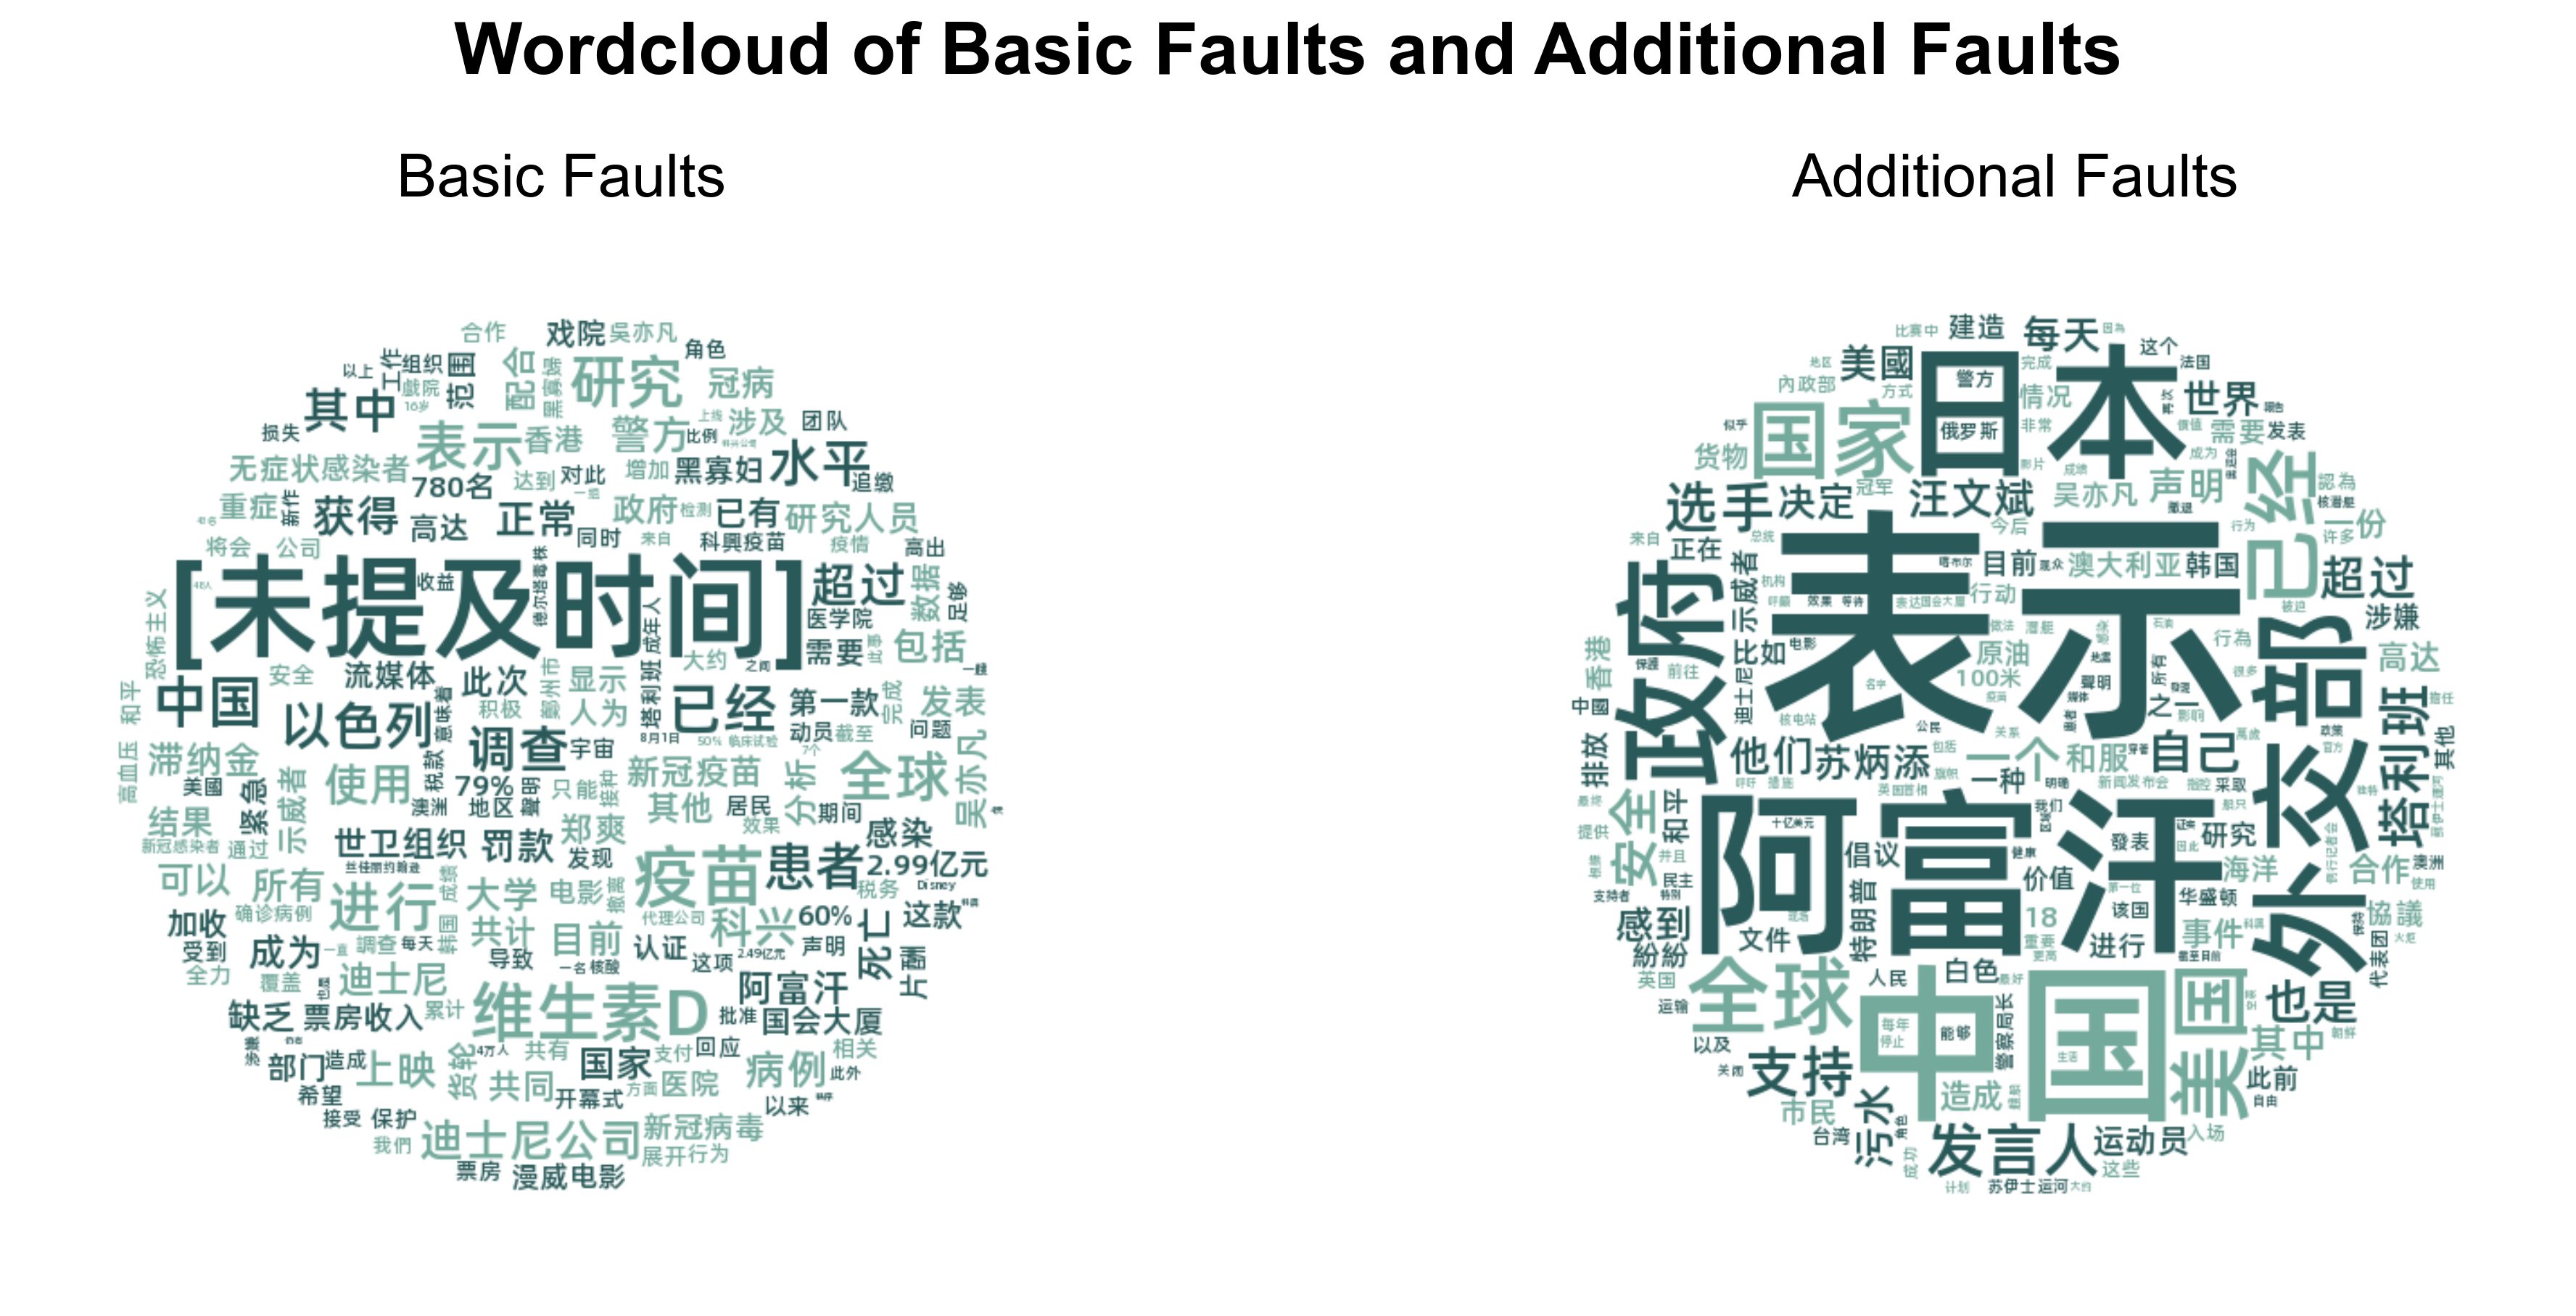

In [435]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
from matplotlib import gridspec
from matplotlib.colors import ListedColormap
from os import path

word_dict_basic = dict(zip(df_word_display['Words'], df_word_display['All']))
word_dict_additional = dict(zip(df_additional_word_display['Words'], df_additional_word_display['All']))

# 将每个子图的数据集和标题放在同一个元组中，方便循环处理
word_datasets = [
    (word_dict_basic, "Basic Faults"),
    (word_dict_additional, "Additional Faults"),
]
# 定义一个圆形 mask
x, y = np.ogrid[:600, :600]
mask = (x - 300) ** 2 + (y - 300) ** 2 > 250 ** 2
mask = 255 * mask.astype(int)

# 创建 3 * 1 的子图布局
fig = plt.figure(figsize=(14, 6), dpi=300)
gs = gridspec.GridSpec(nrows=1, ncols=2)
large_size = 24
font_path = 'external/Alibaba-PuHuiTi-Medium.ttf'

# 依次生成每个子图
for i, dataset in enumerate(word_datasets):
    word_dict, title = dataset
    if i == 0:
        wc = WordCloud(
            background_color="white",
            width=1000,
            height=1000,
            colormap=ListedColormap(['#295A59', '#74AA9C']),
            repeat=False,
            mask=mask,
            font_path=font_path
        )
        wc.generate_from_frequencies(word_dict)
        ax = fig.add_subplot(gs[i])
        ax.imshow(wc, interpolation="bilinear")
        ax.axis("off")
        ax.set_title(title, fontname='Arial',fontsize=20)
    elif i == 1:
        wc = WordCloud(
            background_color="white",
            width=1000,
            height=1000,
            colormap=ListedColormap(['#295A59', '#74AA9C']),
            repeat=False,
            mask=mask,
            font_path=font_path
        )
        wc.generate_from_frequencies(word_dict)
        ax = fig.add_subplot(gs[i])
        ax.imshow(wc, interpolation="bilinear")
        ax.axis("off")
        ax.set_title(title, fontname='Arial', fontsize=20)

fig.suptitle("Wordcloud of Basic Faults and Additional Faults", fontsize=large_size, fontweight='bold', fontname='Arial', y=1)
fig.subplots_adjust(top=0.85)
plt.tight_layout()
plt.show()
fig.savefig('images/Wordcloud.png', dpi=300)

## **Prediction**

In [428]:
def get_predicted_result(score):
    if score < 0.25:
        return 'Truth'
    elif score < 0.5:
        return 'Probably Truth'
    elif score < 0.75:
        return 'Probably Not Truth'
    else:
        return 'Not Truth'
all_df_plot['Predicted Results'] = all_df_plot['Predicted Score'].apply(get_predicted_result)
all_df_plot

,Category,Media,Fact,Generated News,Subjective Commentary,Basic Faults,Additional Faults,Predicted Score,Basic Faults Counts,Additional Faults Counts,Generated News Words Count,Correctness,Basic Faults Split,Additional Faults Split,Predicted Results,Predicted Correctness
0,International Politics,Hong Kong 01,1,据報導，特朗普支持者从早晨开始集结在國會大厦附近，庞大的人群激动地高喊着口号，不断挑衅警方，...,Yes,Time Not Mentioned|,NaN,0.270555,1,0,447,Incorrect,Time Not Mentioned,,Probably Truth,Incorrect
1,International Politics,Hong Kong 01,1,這場政變的引爆源頭是敗選的總統特朗普和一些支持他的共和黨人，他們指控選舉舞弊，不惜煽動支持者...,Yes,Time Not Mentioned|特朗普被指控犯有暴動罪|,比爾·巴爾的選舉舞弊指控|,0.100127,2,1,415,Incorrect,"Time Not Mentioned,特朗普,被,指控,犯,有,暴動罪","比爾·巴爾,的,選舉,舞弊,指控",Truth,Incorrect
2,International Politics,Hong Kong 01,1,今日，美國持續發酵的政治危機再度引發全球關注。2020年選舉敗選總統特朗普的支持者，天真地相...,Yes,Time Not Mentioned|,國民警衛軍緊急出動，發射催淚彈與橡膠子彈鎮壓暴力行動|,0.755723,1,1,336,Incorrect,Time Not Mentioned,"國民警衛軍,緊急,出動,發,射,催淚,彈,與,橡膠子彈鎮壓,暴力行動",Not Truth,Correct
3,International Politics,Hong Kong 01,1,這場突發事件癱瘓了美國的立法機構，不僅讓國會議員們驚恐失措，更讓國際社會大為震驚。\n\n自...,No,NaN,白宮發言人表示，總統拜登認為這是一個“暴力攻擊政府”的事件|,0.059726,0,1,661,Basic Correct,,"白宮發言人,表示,總統,拜登,認為,這,是,一個,“,暴力,攻,擊,政府,”,的,事件",Truth,Incorrect
4,International Politics,Hong Kong 01,1,特朗普支持者衝擊國會，美國陷入政變\n\n美國時間1月6日，敗選總統特朗普的支持者佔領了國會...,Yes,NaN,美國共和國|,0.127581,0,1,540,Basic Correct,,美國共和國,Truth,Incorrect
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,Health & Medicine,Xinhua News Agency,15,6月18日，以色列研究人员在预印本网站医学论文档案网上发布最新研究报告称，缺乏维生素D的人如...,Yes,这项研究是由以色列Tel Aviv大学的研究人员和以色列克拉维火炬科技公司展开的|约有50%...,NaN,0.005339,2,0,566,Incorrect,"这项,研究,是,由,以色列,Tel Aviv,大学,的,研究人员,和,以色列克拉维火炬科技公...",,Truth,Incorrect
446,Health & Medicine,Xinhua News Agency,15,以色列研究人员近日发布了一份有关新冠疫情的医学论文，在该论文中，他们指出缺乏维生素D的人如果...,Yes,这项研究基于约780名新冠肺炎患者的调查|Time Not Mentioned| 研究人员在...,NaN,0.014651,3,0,658,Incorrect,"这项,研究,基于,约,780名,新冠肺炎,患者,的,调查,Time Not Mentione...",,Truth,Incorrect
447,Health & Medicine,Xinhua News Agency,15,近日，以色列研究人员在美国预印本网站医学论文档案网上发表了一篇报告，称如果缺乏维生素D，感染...,Yes,对以色列南部贝尔谢巴的一组新冠感染者进行了跟踪研究，其中包括了大约780名新冠感染者|仍有超...,NaN,0.005126,3,0,618,Incorrect,"对,以色列,南部,贝尔谢巴,的,一组,新冠感染者,进行,了,跟踪,研究,其中,包括,了,大约...",,Truth,Incorrect
448,Health & Medicine,Xinhua News Agency,15,随着新冠疫情在全球蔓延，许多科学家和医生都在努力研究影响感染后发展的因素。而以色列研究人员最...,Yes,Time Not Mentioned|,许多专家和医生发起了一项名为“独处日晒计划”的倡议|,0.008084,1,1,519,Incorrect,Time Not Mentioned,"许多,专家,和,医生,发起,了,一项,名,为,“,独处,日晒,计划,”,的,倡议",Truth,Incorrect


In [429]:
import plotly.graph_objects as go

# 数据
labels = ['Truth', 'Probably Truth', 'Probably Not Truth', 'Not Truth']
values = all_df_plot['Predicted Results'].value_counts()

# 按特定顺序排序
sorted_values = [values[label] for label in labels]

# 设置样式参数
fig = go.Figure(data=[go.Pie(labels=labels, 
                             values=sorted_values, 
                             textinfo='label+percent',
                             sort=False,hole=0.4,marker=dict(colors=['rgb(41,90,89)','rgb(116,170,156)','rgb(152,152,152)','rgb(224,224,224)']))])

# 设置布局参数
fig.update_layout(
    title=dict(text='<b>Porprotion of Predicted Results</b>', font=dict(size=24, family='Arial, sans-serif')),
    font=dict(family='Arial, sans-serif', size=18),
    template="plotly_white",
    width=900,
    height=600
)
fig.update_traces(direction='counterclockwise')
# 保存图片
fig.write_image('images/Predicted Results.png', scale=2)

fig.show()

In [430]:
def result_category(row):
    if row['Correctness'] == 'All Correct' and row['Predicted Results'] in ['Truth', 'Probably Truth']:
        return 'Correct'
    elif row['Correctness'] == 'Incorrect' and row['Predicted Results'] in ['Probably Not Truth', 'Not Truth']:
        return 'Correct'
    elif row['Correctness'] == 'Basic Correct' and row['Predicted Results'] in ['Probably Not Truth', 'Probably Truth']:
        return 'Partially Correct'
    elif row['Correctness'] == 'Basic Correct' and row['Predicted Results'] in ['Not Truth', 'Truth']:
        return 'Incorrect'
    elif row['Correctness'] == 'Incorrect' and row['Predicted Results'] in ['Truth', 'Probably Truth']:
        return 'Incorrect'
    elif row['Correctness'] == 'All Correct' and row['Predicted Results'] in ['Not Truth', 'Probably Not Truth']:
        return 'Incorrect'

# 在表格中增加一列Result Category
all_df_plot['Predicted Correctness'] = all_df_plot.apply(result_category, axis=1)

# 输出结果
all_df_plot

,Category,Media,Fact,Generated News,Subjective Commentary,Basic Faults,Additional Faults,Predicted Score,Basic Faults Counts,Additional Faults Counts,Generated News Words Count,Correctness,Basic Faults Split,Additional Faults Split,Predicted Results,Predicted Correctness
0,International Politics,Hong Kong 01,1,据報導，特朗普支持者从早晨开始集结在國會大厦附近，庞大的人群激动地高喊着口号，不断挑衅警方，...,Yes,Time Not Mentioned|,NaN,0.270555,1,0,447,Incorrect,Time Not Mentioned,,Probably Truth,Incorrect
1,International Politics,Hong Kong 01,1,這場政變的引爆源頭是敗選的總統特朗普和一些支持他的共和黨人，他們指控選舉舞弊，不惜煽動支持者...,Yes,Time Not Mentioned|特朗普被指控犯有暴動罪|,比爾·巴爾的選舉舞弊指控|,0.100127,2,1,415,Incorrect,"Time Not Mentioned,特朗普,被,指控,犯,有,暴動罪","比爾·巴爾,的,選舉,舞弊,指控",Truth,Incorrect
2,International Politics,Hong Kong 01,1,今日，美國持續發酵的政治危機再度引發全球關注。2020年選舉敗選總統特朗普的支持者，天真地相...,Yes,Time Not Mentioned|,國民警衛軍緊急出動，發射催淚彈與橡膠子彈鎮壓暴力行動|,0.755723,1,1,336,Incorrect,Time Not Mentioned,"國民警衛軍,緊急,出動,發,射,催淚,彈,與,橡膠子彈鎮壓,暴力行動",Not Truth,Correct
3,International Politics,Hong Kong 01,1,這場突發事件癱瘓了美國的立法機構，不僅讓國會議員們驚恐失措，更讓國際社會大為震驚。\n\n自...,No,NaN,白宮發言人表示，總統拜登認為這是一個“暴力攻擊政府”的事件|,0.059726,0,1,661,Basic Correct,,"白宮發言人,表示,總統,拜登,認為,這,是,一個,“,暴力,攻,擊,政府,”,的,事件",Truth,Incorrect
4,International Politics,Hong Kong 01,1,特朗普支持者衝擊國會，美國陷入政變\n\n美國時間1月6日，敗選總統特朗普的支持者佔領了國會...,Yes,NaN,美國共和國|,0.127581,0,1,540,Basic Correct,,美國共和國,Truth,Incorrect
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,Health & Medicine,Xinhua News Agency,15,6月18日，以色列研究人员在预印本网站医学论文档案网上发布最新研究报告称，缺乏维生素D的人如...,Yes,这项研究是由以色列Tel Aviv大学的研究人员和以色列克拉维火炬科技公司展开的|约有50%...,NaN,0.005339,2,0,566,Incorrect,"这项,研究,是,由,以色列,Tel Aviv,大学,的,研究人员,和,以色列克拉维火炬科技公...",,Truth,Incorrect
446,Health & Medicine,Xinhua News Agency,15,以色列研究人员近日发布了一份有关新冠疫情的医学论文，在该论文中，他们指出缺乏维生素D的人如果...,Yes,这项研究基于约780名新冠肺炎患者的调查|Time Not Mentioned| 研究人员在...,NaN,0.014651,3,0,658,Incorrect,"这项,研究,基于,约,780名,新冠肺炎,患者,的,调查,Time Not Mentione...",,Truth,Incorrect
447,Health & Medicine,Xinhua News Agency,15,近日，以色列研究人员在美国预印本网站医学论文档案网上发表了一篇报告，称如果缺乏维生素D，感染...,Yes,对以色列南部贝尔谢巴的一组新冠感染者进行了跟踪研究，其中包括了大约780名新冠感染者|仍有超...,NaN,0.005126,3,0,618,Incorrect,"对,以色列,南部,贝尔谢巴,的,一组,新冠感染者,进行,了,跟踪,研究,其中,包括,了,大约...",,Truth,Incorrect
448,Health & Medicine,Xinhua News Agency,15,随着新冠疫情在全球蔓延，许多科学家和医生都在努力研究影响感染后发展的因素。而以色列研究人员最...,Yes,Time Not Mentioned|,许多专家和医生发起了一项名为“独处日晒计划”的倡议|,0.008084,1,1,519,Incorrect,Time Not Mentioned,"许多,专家,和,医生,发起,了,一项,名,为,“,独处,日晒,计划,”,的,倡议",Truth,Incorrect


In [431]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# 数据
labels = ['Correct', 'Partially Correct', 'Incorrect']
values = all_df_plot['Predicted Correctness'].value_counts()

# 按特定顺序排序
sorted_values = [values[label] for label in labels]
fig = go.Figure()
# 设置样式参数
fig.add_trace(go.Pie(labels=labels, 
                             values=sorted_values, 
                             textinfo='label+percent',
                             sort=False,hole=0.4,marker=dict(colors=['rgb(41,90,89)','rgb(116,170,156)','rgb(152,152,152)','rgb(224,224,224)'])))


# 设置布局参数
fig.update_layout(
    title=dict(text='<b>Porprotion of Predicted Correctness</b>', font=dict(size=24, family='Arial, sans-serif')),
    font=dict(family='Arial, sans-serif', size=18),
    template="plotly_white",
    width=900,
    height=600,showlegend=False
)
fig.update_traces(direction='clockwise')
# 保存图片
fig.write_image('images/Predicted Correctness Results.png', scale=2)

fig.show()

In [43]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

# 手动筛选需要的列
heatmap_df = all_df_plot[['Predicted Correctness', 'Correctness']]


fig = px.density_heatmap(heatmap_df, y='Predicted Correctness', x='Correctness',
                         title='<b>Predicted Correctness by Actual Correctness</b>', 
                         labels={'Predicted Correctness': '<b>Predicted Correctness</b>', 
                                 'Correctness': '<b>Actual Correctness</b>'},
                         template='plotly_white',color_continuous_scale='Darkmint')

fig.update_traces(showlegend=True)

# 设置图例文字大小
fig.update_layout(legend=dict(font=dict(size=18)))

# 设置总标题字体和大小
fig.update_layout(title_font=dict(family='Arial, sans-serif', size=24),font=dict(family='Arial, sans-serif', size=18))


# 设置图片大小和比例
fig.update_layout(width=900, height=600)
fig.update_layout(images=[dict(
    source="https://raw.githubusercontent.com/FlyAI/materials/master/images/logo.png",
    xref="paper", yref="paper",
    x=1.01, y=1.02,
    sizex=0.2, sizey=0.2,
    xanchor="right", yanchor="bottom"
)],showlegend=False)

# 生成图片文件
pio.write_image(fig, file='images/Predicted Correctness vs correctness.png', 
                format='png', scale=2)
fig.show()

In [432]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

# 手动筛选需要的列
heatmap_df = all_df_plot[['Predicted Correctness', 'Category']]


fig = px.density_heatmap(heatmap_df, y='Predicted Correctness', x='Category',
                         title='<b>Predicted Correctness by Category</b>', 
                         labels={'Predicted Correctness': '<b>Predicted Correctness</b>', 
                                 'Category': '<b>Category</b>'},
                         template='plotly_white',color_continuous_scale='Darkmint')

fig.update_traces(showlegend=True)

# 设置图例文字大小
fig.update_layout(legend=dict(font=dict(size=18)))

# 设置总标题字体和大小
fig.update_layout(title_font=dict(family='Arial, sans-serif', size=24),font=dict(family='Arial, sans-serif', size=18))


# 设置图片大小和比例
fig.update_layout(width=900, height=600)
fig.update_layout(images=[dict(
    source="https://raw.githubusercontent.com/FlyAI/materials/master/images/logo.png",
    xref="paper", yref="paper",
    x=1.01, y=1.02,
    sizex=0.2, sizey=0.2,
    xanchor="right", yanchor="bottom"
)],showlegend=False)

# 生成图片文件
pio.write_image(fig, file='images/Predicted Correctness vs Category.png', 
                format='png', scale=2)
fig.show()